In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="True"

#Check if previous environment variable has been added
# for name, value in os.environ.items():
#     print("{0}: {1}".format(name, value))

## Transfer learning using pretrained model 'yolov7.pt'

#### Training

In [2]:
!python yolov7/train.py --help

usage: train.py [-h] [--weights WEIGHTS] [--cfg CFG] [--data DATA] [--hyp HYP]
                [--epochs EPOCHS] [--batch-size BATCH_SIZE]
                [--img-size IMG_SIZE [IMG_SIZE ...]] [--rect]
                [--resume [RESUME]] [--nosave] [--notest] [--noautoanchor]
                [--evolve] [--bucket BUCKET] [--cache-images]
                [--image-weights] [--device DEVICE] [--multi-scale]
                [--single-cls] [--adam] [--sync-bn] [--local_rank LOCAL_RANK]
                [--workers WORKERS] [--project PROJECT] [--entity ENTITY]
                [--name NAME] [--exist-ok] [--quad] [--linear-lr]
                [--label-smoothing LABEL_SMOOTHING] [--upload_dataset]
                [--bbox_interval BBOX_INTERVAL] [--save_period SAVE_PERIOD]
                [--artifact_alias ARTIFACT_ALIAS]
                [--freeze FREEZE [FREEZE ...]] [--v5-metric]

optional arguments:
  -h, --help            show this help message and exit
  --weights WEIGHTS     initial weights p

In [3]:
!python yolov7/train.py --batch 2 --workers 8 --cfg yolov7/cfg/training/yolov7.yaml --epochs 3 --data data/monkey_cat_dog_asYolov7input/data.yaml --img 640 --weights 'PROJECT_output_mcd/mcd_batch2/weights/best.pt' --device 0 --project PROJECT_output_mcd --name mcd_batch2_after51epoch_prueba --hyp yolov7/data/hyp.scratch.custom.yaml

^C


#### Get visualization of results.txt in results.png

In [ ]:
import sys
sys.path.append('../Segmentation_ObjectDetection/yolov7/')

In [ ]:
from yolov7.utils.plots import *
plot_results(save_dir='PROJECT_output_mcd/mcd_batch2')

c:\Users\DannW\Anaconda3\envs\yolov7_env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Evaluation on test images

In [ ]:
# Run evaluation
!python yolov7/detect.py --weights PROJECT_output_mcd/mcd_batch16_epoch55/weights/best.pt --conf 0.536 --source data/monkey_cat_dog_asYolov7input/test/images

# conf: ['0.268', '0.536']

Namespace(weights=['PROJECT_output_mcd/mcd_batch16_epoch55/weights/best.pt'], source='data/monkey_cat_dog_asYolov7input/test/images', img_size=640, conf_thres=0.536, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

path:  h:\Documentos\Code\ML_BasicNets_Tutorials\Segmentation_ObjectDetection\data\monkey_cat_dog_asYolov7input\test\images False
1 cat, Done. (71.5ms) Inference, (5.0ms) NMS
 The image with the result is saved in: runs\detect\exp\cats_000.jpg
2 cats, Done. (67.0ms) Inference, (2.0ms) NMS
 The image with the result is saved in: runs\detect\exp\cats_007.jpg
1 cat, Done. (58.5ms) Inference, (2.0ms) NMS
 The image with 

YOLOR  786d103 torch 1.8.0 CUDA:0 (NVIDIA GeForce GTX 1060, 3071.8125MB)

Model Summary: 314 layers, 36492560 parameters, 6194944 gradients, 103.2 GFLOPS


runs/detect/exp\cats_000.jpg


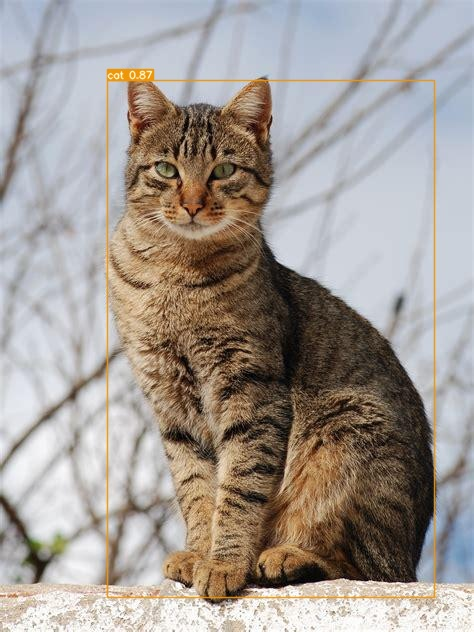



runs/detect/exp\cats_007.jpg


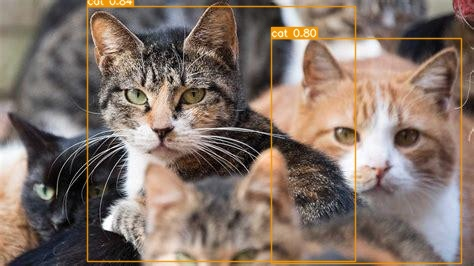



runs/detect/exp\cats_050.jpg


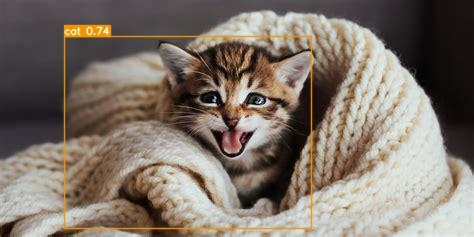



runs/detect/exp\cats_072.jpg


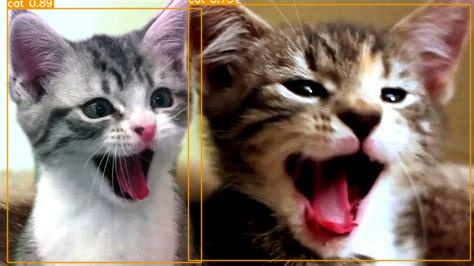



runs/detect/exp\cats_076.jpg


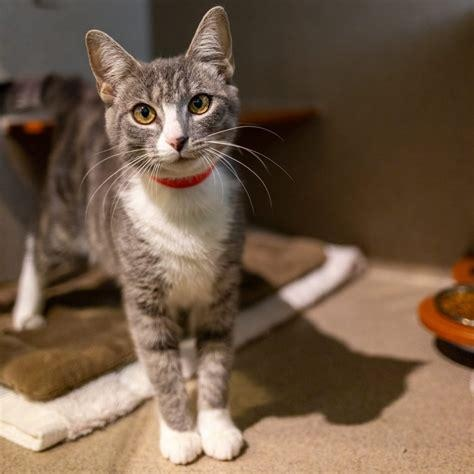



runs/detect/exp\cats_079.jpg


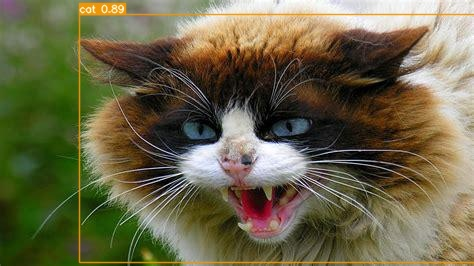



runs/detect/exp\cats_088.jpg


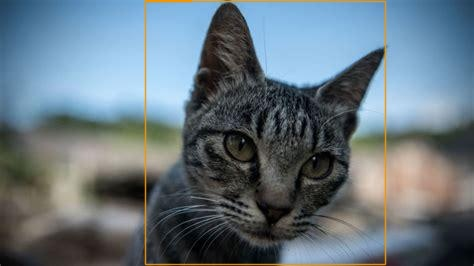



runs/detect/exp\cats_091.jpg


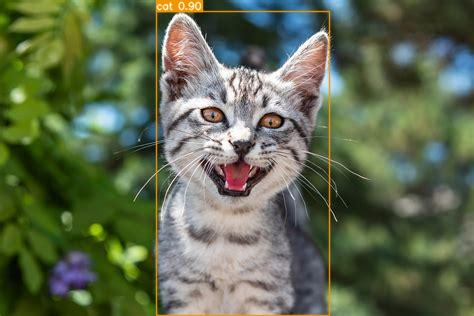



runs/detect/exp\cats_099.jpg


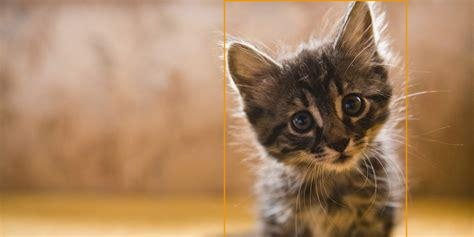



runs/detect/exp\cats_100.jpg


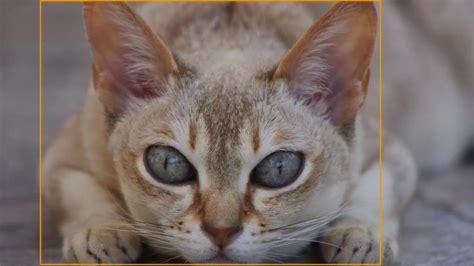



runs/detect/exp\cats_and_monkeys_000.jpg


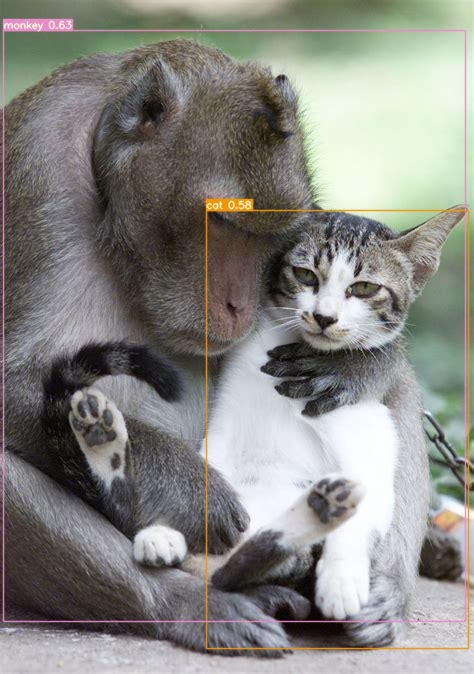



runs/detect/exp\cats_and_monkeys_002.jpg


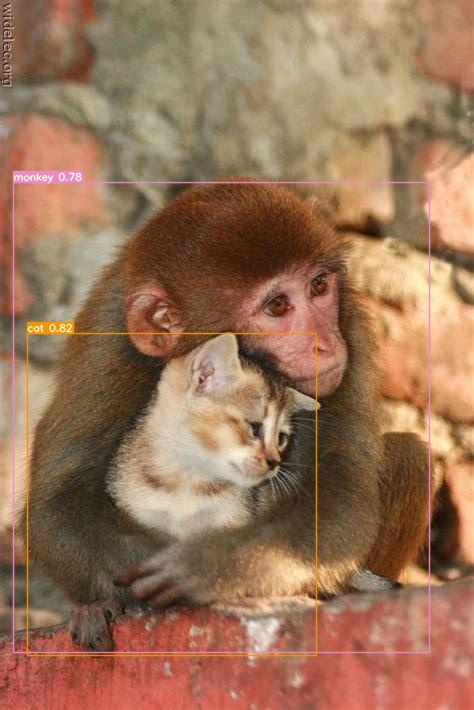



runs/detect/exp\cats_and_monkeys_029.jpg


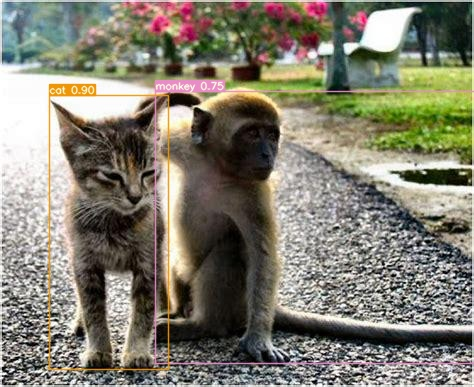



runs/detect/exp\cats_groups_031.jpg


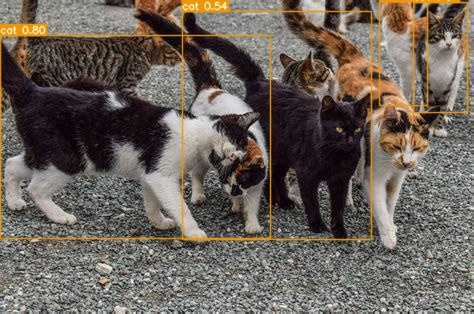



runs/detect/exp\cats_groups_039.jpg


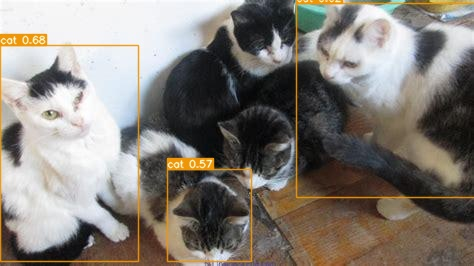



runs/detect/exp\cats_groups_057.jpg


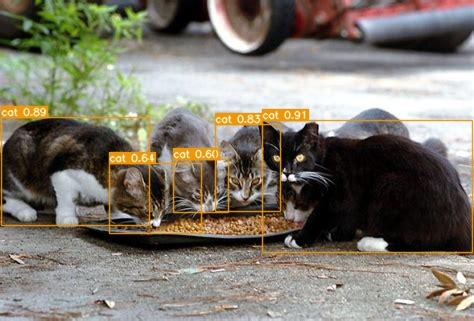



runs/detect/exp\cats_groups_090.jpg


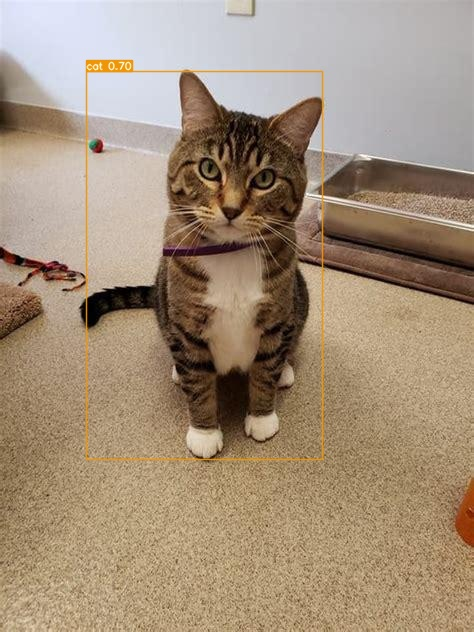



runs/detect/exp\cats_groups_092.jpg


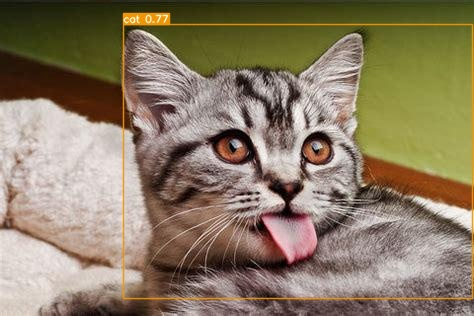



runs/detect/exp\dogs_033.jpg


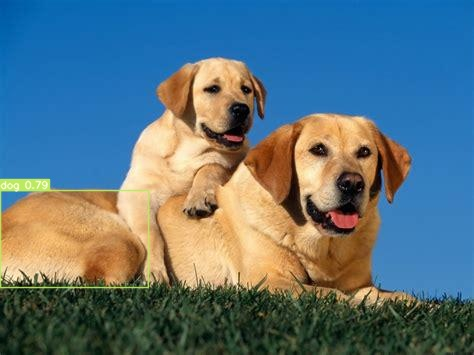



runs/detect/exp\dogs_042.jpg


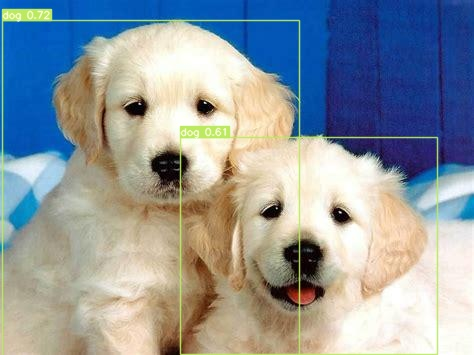



runs/detect/exp\dogs_062.jpg


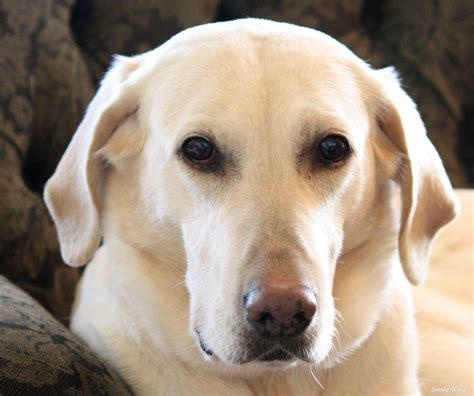



runs/detect/exp\dogs_070.jpg


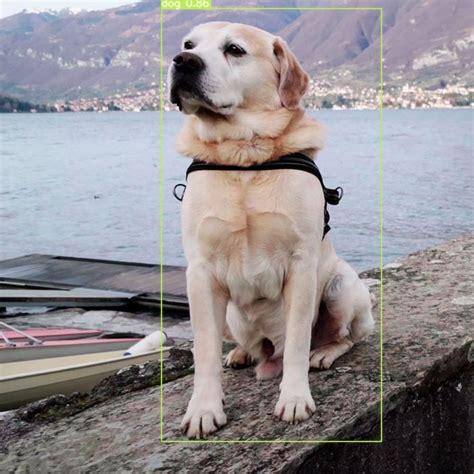



runs/detect/exp\dogs_072.jpg


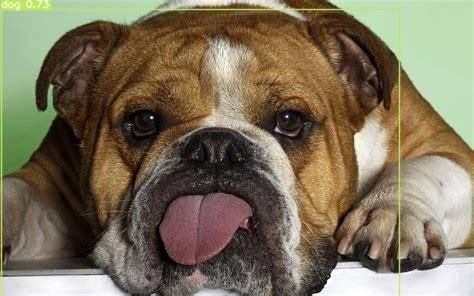



runs/detect/exp\dogs_079.jpg


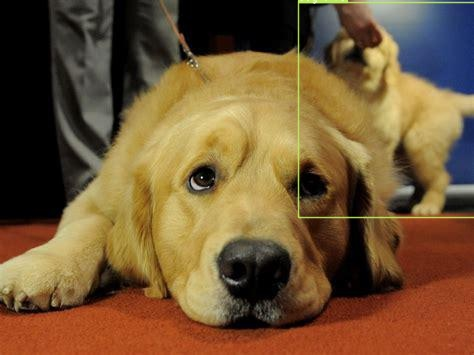



runs/detect/exp\dogs_086.jpg


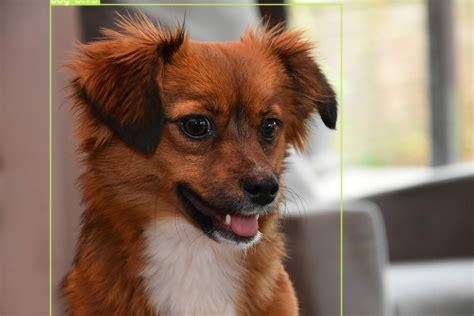



runs/detect/exp\dogs_089.jpg


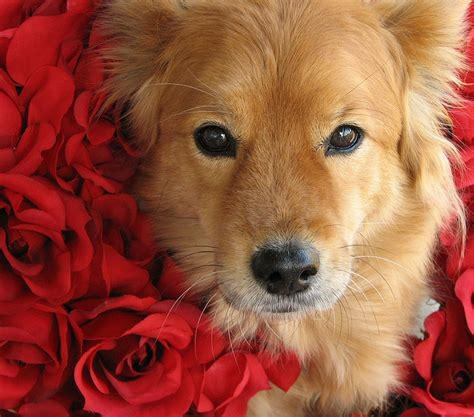



runs/detect/exp\dogs_093.jpg


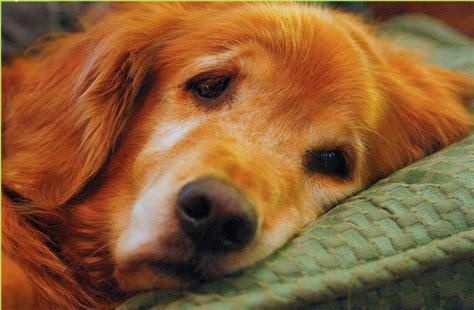



runs/detect/exp\dogs_and_cats_014.jpg


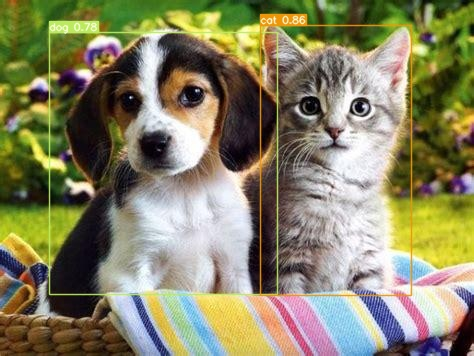



runs/detect/exp\dogs_and_cats_021.jpg


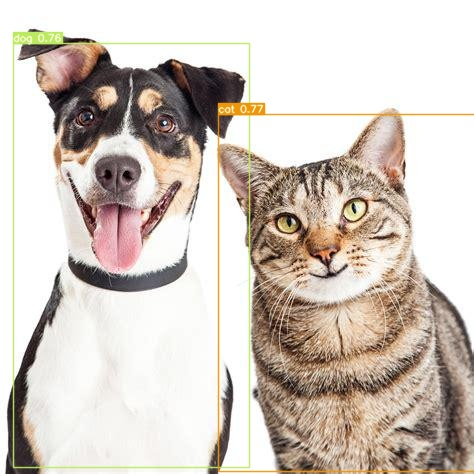



runs/detect/exp\dogs_and_cats_043.jpg


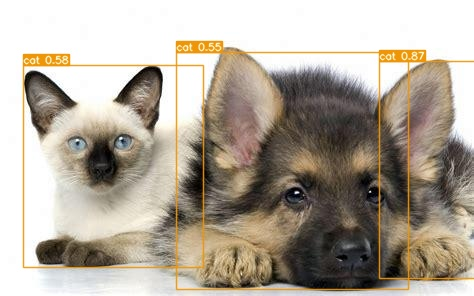



runs/detect/exp\dogs_and_cats_059.jpg


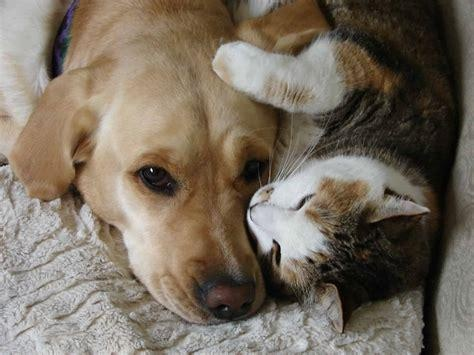



runs/detect/exp\dogs_and_cats_079.jpg


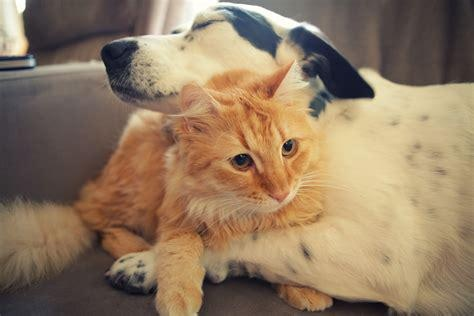



runs/detect/exp\dogs_and_cats_093.jpg


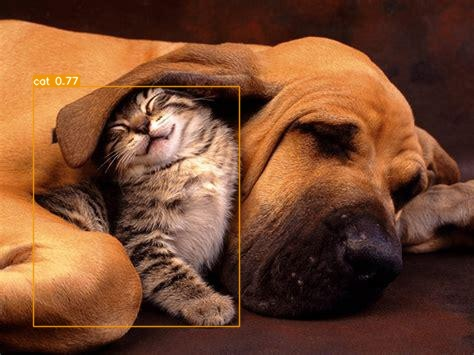



runs/detect/exp\dogs_groups_009.jpg


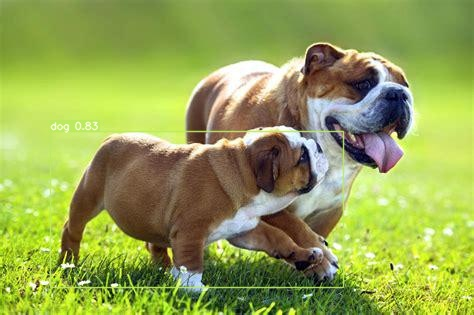



runs/detect/exp\dogs_groups_012.jpg


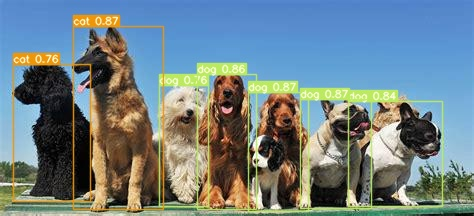



runs/detect/exp\dog_and_monkey_035.jpg


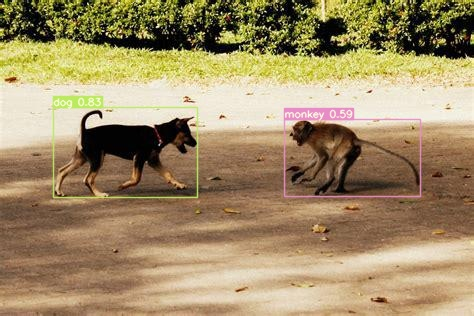



runs/detect/exp\dog_and_monkey_046.jpg


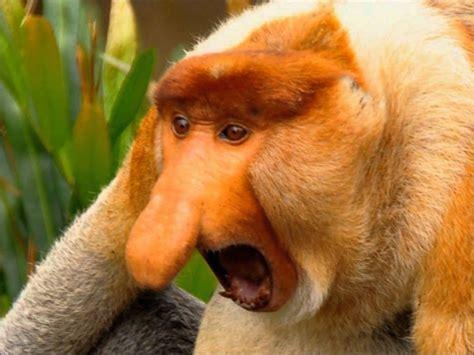



runs/detect/exp\dog_and_monkey_049.jpg


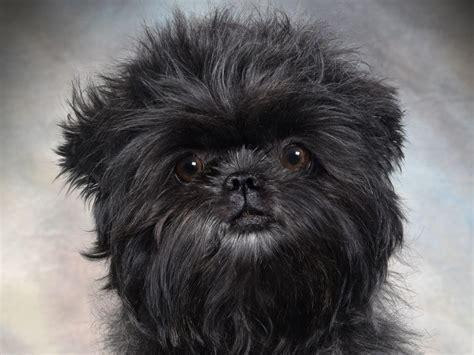



runs/detect/exp\monkeys_001.jpg


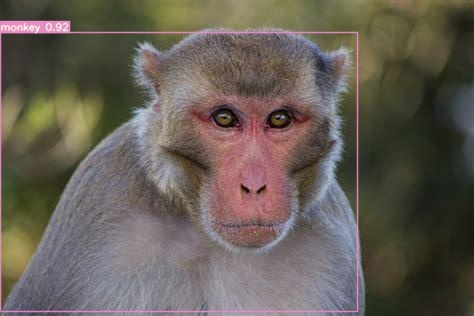



runs/detect/exp\monkeys_019.jpg


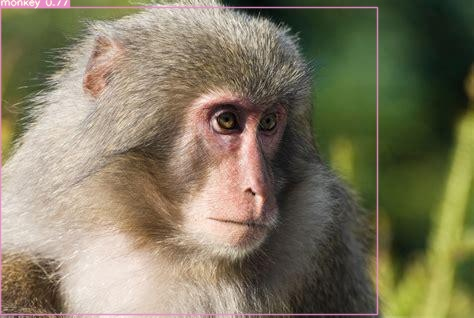



runs/detect/exp\monkeys_022.jpg


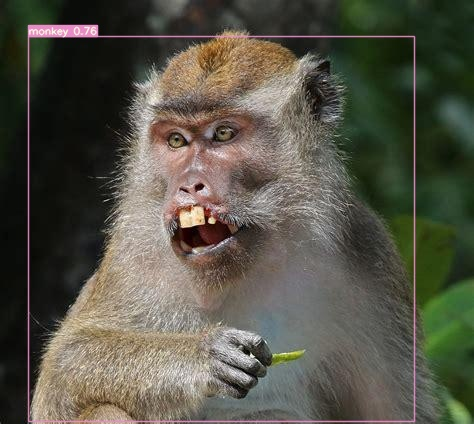



runs/detect/exp\monkeys_027.jpg


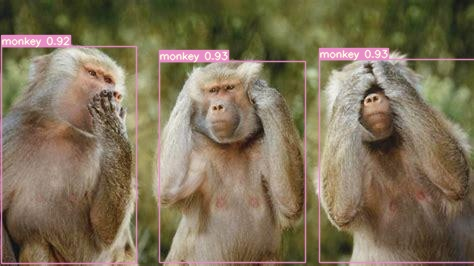



runs/detect/exp\monkeys_037.jpg


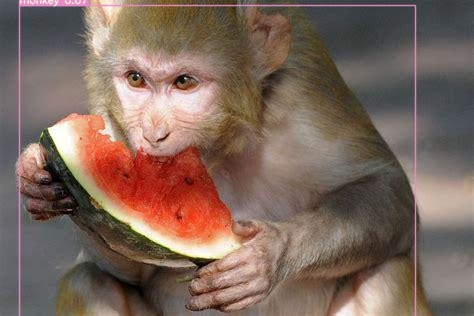



runs/detect/exp\monkeys_038.jpg


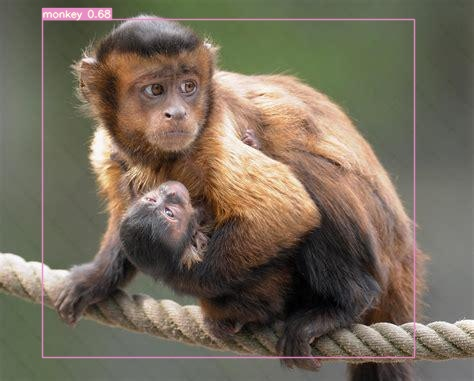



runs/detect/exp\monkeys_085.jpg


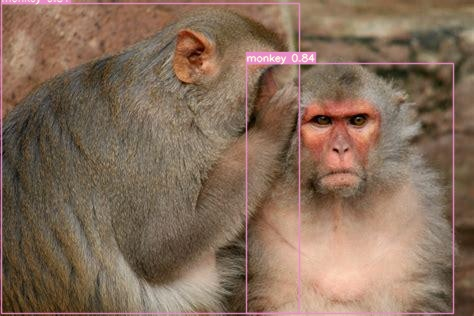



runs/detect/exp\monkeys_088.jpg


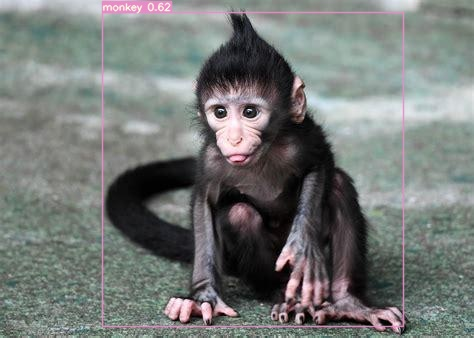



runs/detect/exp\monkeys_093.jpg


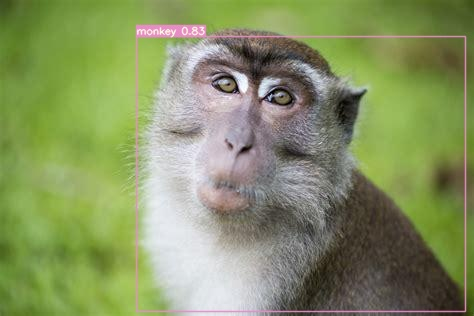



runs/detect/exp\monkey_groups_005.jpg


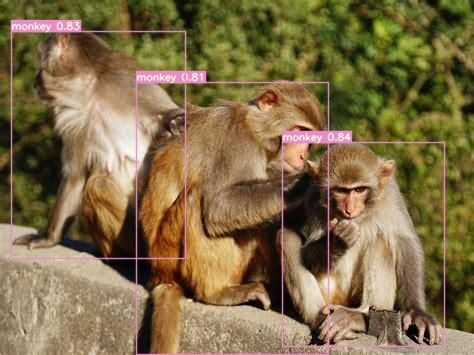



runs/detect/exp\monkey_groups_023.jpg


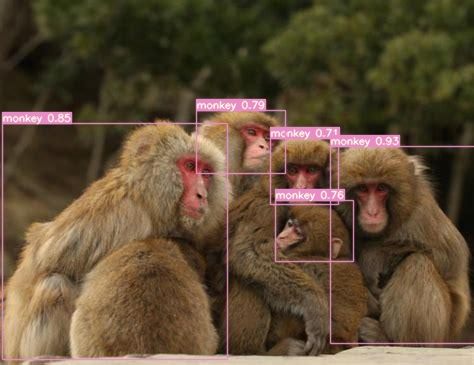



runs/detect/exp\monkey_groups_056.jpg


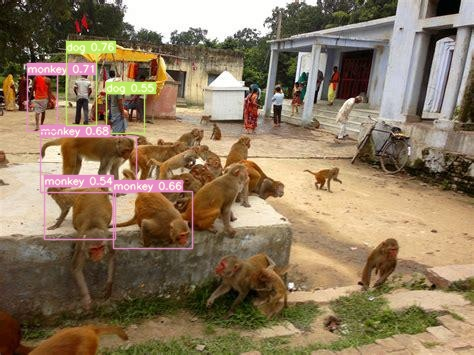



runs/detect/exp\monkey_groups_061.jpg


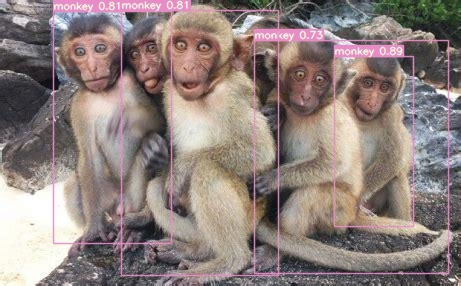

In [1]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

i = 0
limit = 10000 # max images to print
for imageName in glob.glob('runs/detect/exp/*.jpg'):
    print(imageName)
    #Assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n")
    i = i + 1

## Inference on test images


In [1]:
import os
import sys
sys.path.append('yolov7')


import argparse
import time
from pathlib import Path
import cv2
import torch
import numpy as np
import torch.backends.cudnn as cudnn
from numpy import random

from models.experimental import attempt_load
from utils.datasets import LoadStreams, LoadImages
from utils.general import check_img_size, check_requirements, check_imshow, non_max_suppression, apply_classifier, \
    scale_coords, xyxy2xywh, strip_optimizer, set_logging, increment_path
from utils.plots import plot_one_box
from utils.torch_utils import select_device, load_classifier, time_synchronized, TracedModel


def letterbox(img, new_shape=(640, 640), color=(114, 114, 114), auto=True, scaleFill=False, scaleup=True, stride=32):
    # Resize and pad image while meeting stride-multiple constraints
    shape = img.shape[:2]  # current shape [height, width]
    if isinstance(new_shape, int):
        new_shape = (new_shape, new_shape)

    # Scale ratio (new / old)
    r = min(new_shape[0] / shape[0], new_shape[1] / shape[1])
    if not scaleup:  # only scale down, do not scale up (for better test mAP)
        r = min(r, 1.0)

    # Compute padding
    ratio = r, r  # width, height ratios
    new_unpad = int(round(shape[1] * r)), int(round(shape[0] * r))
    dw, dh = new_shape[1] - new_unpad[0], new_shape[0] - new_unpad[1]  # wh padding
    if auto:  # minimum rectangle
        dw, dh = np.mod(dw, stride), np.mod(dh, stride)  # wh padding
    elif scaleFill:  # stretch
        dw, dh = 0.0, 0.0
        new_unpad = (new_shape[1], new_shape[0])
        ratio = new_shape[1] / shape[1], new_shape[0] / shape[0]  # width, height ratios

    dw /= 2  # divide padding into 2 sides
    dh /= 2

    if shape[::-1] != new_unpad:  # resize
        img = cv2.resize(img, new_unpad, interpolation=cv2.INTER_LINEAR)
    top, bottom = int(round(dh - 0.1)), int(round(dh + 0.1))
    left, right = int(round(dw - 0.1)), int(round(dw + 0.1))
    img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)  # add border
    return img, ratio, (dw, dh)

In [39]:
classes_to_filter = ['monkey', 'cat', 'dog']  #You can give list of classes to filter by name, Be happy you don't have to put class number. ['train','person' ]


opt  = {
    
    "weights": "PROJECT_output_mcd/mcd_batch16_epoch200/weights/best.pt", # Path to weights file default weights are for nano model
    "yaml"   : "data/monkey_cat_dog_asYolov7input/data.yaml",
    "img-size": 640, # default image size
    "conf-thres": 0.527, # confidence threshold for inference.
    "iou-thres" : 0.45, # NMS IoU threshold for inference.
    "device" : 'cpu',  # device to run our model i.e. 0 or 0,1,2,3 or cpu
    "classes" : classes_to_filter  # list of classes to filter or None

}

In [36]:
source_image_path = 'data/monkey_cat_dog_asYolov7input/test/images/monkeys_038.jpg'

In [40]:
with torch.no_grad():
  weights, imgsz = opt['weights'], opt['img-size']
  set_logging()
  device = select_device(opt['device'])
  half = device.type != 'cpu'
  model = attempt_load(weights, map_location=device)  # load FP32 model
  stride = int(model.stride.max())  # model stride
  imgsz = check_img_size(imgsz, s=stride)  # check img_size
  if half:
    model.half()

  names = model.module.names if hasattr(model, 'module') else model.names
  colors = [[random.randint(0, 255) for _ in range(3)] for _ in names]
  if device.type != 'cpu':
    model(torch.zeros(1, 3, imgsz, imgsz).to(device).type_as(next(model.parameters())))

  img0 = cv2.imread(source_image_path)
  img = letterbox(img0, imgsz, stride=stride)[0]
  img = img[:, :, ::-1].transpose(2, 0, 1)  # BGR to RGB, to 3x416x416
  img = np.ascontiguousarray(img)
  img = torch.from_numpy(img).to(device)
  img = img.half() if half else img.float()  # uint8 to fp16/32
  img /= 255.0  # 0 - 255 to 0.0 - 1.0
  if img.ndimension() == 3:
    img = img.unsqueeze(0)

  # Inference
  t1 = time_synchronized()
  pred = model(img, augment= False)[0]

  # Apply NMS
  classes = None
  if opt['classes']:
    classes = []
    for class_name in opt['classes']:

      classes.append(opt['classes'].index(class_name))


  pred = non_max_suppression(pred, opt['conf-thres'], opt['iou-thres'], classes= classes, agnostic= False)
  t2 = time_synchronized()
  for i, det in enumerate(pred):
    s = ''
    s += '%gx%g ' % img.shape[2:]  # print string
    gn = torch.tensor(img0.shape)[[1, 0, 1, 0]]
    if len(det):
      det[:, :4] = scale_coords(img.shape[2:], det[:, :4], img0.shape).round()

      for c in det[:, -1].unique():
        n = (det[:, -1] == c).sum()  # detections per class
        s += f"{n} {names[int(c)]}{'s' * (n > 1)}, "  # add to string
    
      for *xyxy, conf, cls in reversed(det):

        label = f'{names[int(cls)]} {conf:.2f}'
        plot_one_box(xyxy, img0, label=label, color=colors[int(cls)], line_thickness=3)



YOLOR  786d103 torch 1.8.0 CPU



Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse


Model Summary: 314 layers, 36492560 parameters, 6194944 gradients, 103.2 GFLOPS


In [30]:
pred

[tensor([[ 40.00000,  16.00000, 426.00000, 354.00000,   0.91978,   0.00000]])]

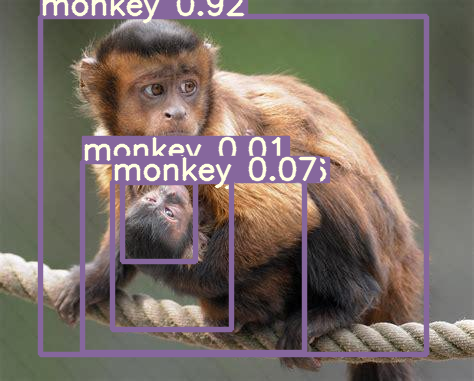

In [41]:
from PIL import Image
img0_arr = cv2.cvtColor(img0, cv2.COLOR_BGR2RGB)
img0_img = Image.fromarray(img0_arr)
img0_img